# SF-DAT-21 | Lab 05: Storms, `pandas`, and GitHub | Ivan's Notebook

## CODE TO GET YOU STARTED

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'Storms.csv.bz2'))

In [3]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1,4/18/1950 0:00:00,130,CST,97,...,8812,3051,8806,NaN,1
1,1,4/18/1950 0:00:00,145,CST,3,...,8755,0,0,NaN,2
2,1,2/20/1951 0:00:00,1600,CST,57,...,8742,0,0,NaN,3
3,1,6/8/1951 0:00:00,900,CST,89,...,8626,0,0,NaN,4
4,1,11/15/1951 0:00:00,1500,CST,43,...,8642,0,0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
902292,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...,902293
902293,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...,902294
902294,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...,902295
902295,2,11/9/2011 0:00:00,10:21:00 AM,AKS,202,...,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...,902296


# NOT AN ANSWER KEY!!!  SEE THIS AS CODE FOR DATA EXPLORATION

## Columns

In [4]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS',
       u'REFNUM'],
      dtype='object')

In [5]:
len(df.columns)

37

Set the dataframe index to `REFNUM`.

In [6]:
df = df.set_index('REFNUM')

In [7]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,3042,8755,0,0,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,3340,8742,0,0,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,3458,8626,0,0,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,3412,8642,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...


## Check for missing values

In [8]:
df.isnull()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,False,False,False,False,False,...,False,False,False,False,True
2,False,False,False,False,False,...,False,False,False,False,True
3,False,False,False,False,False,...,False,False,False,False,True
4,False,False,False,False,False,...,False,False,False,False,True
5,False,False,False,False,False,...,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
902293,False,False,False,False,False,...,False,False,False,False,False
902294,False,False,False,False,False,...,False,False,False,False,False
902295,False,False,False,False,False,...,False,False,False,False,False


Number of missing values per column

In [9]:
df.isnull().sum()

STATE__            0
BGN_DATE           0
BGN_TIME           0
TIME_ZONE          0
COUNTY             0
               ...  
LATITUDE          47
LONGITUDE          0
LATITUDE_E        40
LONGITUDE_         0
REMARKS       287433
dtype: int64

Total number of missing values in the dataset

In [10]:
df.FATALITIES.isnull().sum()

0

In [11]:
df.isnull().sum().sum()

6645709L

In [12]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS'],
      dtype='object')

In [13]:
df.columns[df.isnull().sum() > 0]

Index([u'COUNTYNAME', u'BGN_AZI', u'BGN_LOCATI', u'END_DATE', u'END_TIME',
       u'COUNTYENDN', u'END_AZI', u'END_LOCATI', u'F', u'PROPDMGEXP',
       u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES', u'LATITUDE',
       u'LATITUDE_E', u'REMARKS'],
      dtype='object')

In [14]:
n = len(df)

for column in df.columns:
    count = df[column].isnull().sum()
    if count > 0:
        print '{:10s} {:6d} {:3.0f}%'.format(column, count, 100. * count / n)

COUNTYNAME   1589   0%
BGN_AZI    547332  61%
BGN_LOCATI 287743  32%
END_DATE   243411  27%
END_TIME   238978  26%
COUNTYENDN 902297 100%
END_AZI    724837  80%
END_LOCATI 499225  55%
F          843563  93%
PROPDMGEXP 465934  52%
CROPDMGEXP 618413  69%
WFO        142069  16%
STATEOFFIC 248769  28%
ZONENAMES  594029  66%
LATITUDE       47   0%
LATITUDE_E     40   0%
REMARKS    287433  32%


Or

In [15]:
n = len(df)

for column in df.columns:
    count = n - df[column].count()
    if count > 0:
        print '{:10s} {:6d} {:3.0f}%'.format(column, count, 100. * count / n)

COUNTYNAME   1589   0%
BGN_AZI    547332  61%
BGN_LOCATI 287743  32%
END_DATE   243411  27%
END_TIME   238978  26%
COUNTYENDN 902297 100%
END_AZI    724837  80%
END_LOCATI 499225  55%
F          843563  93%
PROPDMGEXP 465934  52%
CROPDMGEXP 618413  69%
WFO        142069  16%
STATEOFFIC 248769  28%
ZONENAMES  594029  66%
LATITUDE       47   0%
LATITUDE_E     40   0%
REMARKS    287433  32%


Or

In [16]:
n = len(df)

for column in df.columns:
    count = n - df[column].notnull().sum()
    if count > 0:
        print '{:10s} {:6d} {:3.0f}%'.format(column, count, 100. * count / n)

COUNTYNAME   1589   0%
BGN_AZI    547332  61%
BGN_LOCATI 287743  32%
END_DATE   243411  27%
END_TIME   238978  26%
COUNTYENDN 902297 100%
END_AZI    724837  80%
END_LOCATI 499225  55%
F          843563  93%
PROPDMGEXP 465934  52%
CROPDMGEXP 618413  69%
WFO        142069  16%
STATEOFFIC 248769  28%
ZONENAMES  594029  66%
LATITUDE       47   0%
LATITUDE_E     40   0%
REMARKS    287433  32%


In [17]:
# drop rows with at least one NaN
df.dropna()

# Equivalents:
# df.dropna(how = 'any')
# df.dropna(axis = 0)
# df.dropna(how = 'any', axis = 0)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,


In [18]:
# drop column with at least one NaN
df.dropna(axis = 1)

# Equivalents:
# df.dropna(how = 'any', axis = 1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,INJURIES,PROPDMG,CROPDMG,LONGITUDE,LONGITUDE_
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,15,25.0,0,8812,8806
2,1,4/18/1950 0:00:00,145,CST,3,...,0,2.5,0,8755,0
3,1,2/20/1951 0:00:00,1600,CST,57,...,2,25.0,0,8742,0
4,1,6/8/1951 0:00:00,900,CST,89,...,2,2.5,0,8626,0
5,1,11/15/1951 0:00:00,1500,CST,43,...,2,2.5,0,8642,0
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0.0,0,0,0
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0.0,0,0,0
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0.0,0,0,0


In [19]:
# drop rows with all values as NaN
df.dropna(how = 'all')

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,3042,8755,0,0,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,3340,8742,0,0,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,3458,8626,0,0,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,3412,8642,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...


In [20]:
# drop columns with all values as NaN
df.dropna(how = 'all', axis = 1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,3042,8755,0,0,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,3340,8742,0,0,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,3458,8626,0,0,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,3412,8642,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...


In [21]:
# You can also use thresholds
# df.dropna(thresh =)

## Handling duplicate data

In [22]:
df.duplicated()

REFNUM
1         False
2         False
3         False
4         False
5         False
          ...  
902293    False
902294    False
902295    False
902296    False
902297    False
dtype: bool

In [23]:
df.duplicated().sum()

3143

In [24]:
df[df.duplicated()]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
19,1,5/10/1952 0:00:00,900,CST,57,...,3344,8745,0,0,NaN
20,1,5/10/1952 0:00:00,900,CST,57,...,3344,8745,0,0,NaN
260,1,7/4/1960 0:00:00,1750,CST,13,...,3139,8636,0,0,NaN
603,1,5/14/1967 0:00:00,2330,CST,77,...,3453,8730,0,0,NaN
604,1,5/14/1967 0:00:00,2330,CST,77,...,3453,8730,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
900771,38,10/7/2011 0:00:00,03:00:00 PM,CST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong early October low ...
900806,27,10/7/2011 0:00:00,04:00:00 PM,CST,1,...,0,0,0,0,EPISODE NARRATIVE: A strong early October low ...
900807,36,10/29/2011 0:00:00,01:00:00 PM,EST,57,...,0,0,0,0,EPISODE NARRATIVE: An early season winter stor...


In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.duplicated().sum()

0

In [27]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3040,8812,3051,8806,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,3042,8755,0,0,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,3340,8742,0,0,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,3458,8626,0,0,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,3412,8642,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,0,0,EPISODE NARRATIVE: A strong cold front moved s...
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,0,0,EPISODE NARRATIVE: A strong westerly flow alof...
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,0,0,EPISODE NARRATIVE: A 960 mb low over the south...


## Fatalities and Injuries

In [28]:
df.rename(columns = {'FATALITIES': 'Fatalities', 'INJURIES': 'Injuries'}, inplace = True)

## Property and Crop Damages

In [29]:
np.sort(df.PROPDMGEXP.unique())

array([nan, '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '?',
       'B', 'H', 'K', 'M', 'h', 'm'], dtype=object)

In [30]:
np.sort(df.CROPDMGEXP.unique())

array([nan, '0', '2', '?', 'B', 'K', 'M', 'k', 'm'], dtype=object)

In [31]:
exponent_to_multiplier = pd.Series(
    {np.nan: np.nan, '+': np.nan, '-': np.nan, '?': np.nan,
     '0': 10 ** 0,
     '1': 10 ** 1,
     '2': 10 ** 2, 'H': 10 ** 2, 'h': 10 ** 2,
     '3': 10 ** 3,'K': 10 ** 3,'k': 10 ** 3,
     '4': 10 ** 4,
     '5': 10 ** 5,
     '6': 10 ** 6, 'M': 10 ** 6, 'm': 10 ** 6,
     '7': 10 ** 7,
     '8': 10 ** 8,
     'B': 10 ** 9}
)

In [32]:
df['PropertyDamages'] = df.PROPDMG * df.PROPDMGEXP.map(exponent_to_multiplier)

In [33]:
df['CropDamages'] = df.CROPDMG * df.CROPDMGEXP.map(exponent_to_multiplier)

In [34]:
df.PropertyDamages

REFNUM
1         25000
2          2500
3         25000
4          2500
5          2500
          ...  
902293        0
902294        0
902295        0
902296        0
902297        0
Name: PropertyDamages, dtype: float64

In [35]:
df.drop(['PROPDMG', 'PROPDMGEXP', 'CROPDMG', 'CROPDMGEXP'], axis = 1, inplace = True)

In [36]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE_E,LONGITUDE_,REMARKS,PropertyDamages,CropDamages
REFNUM,,,,,,,,,,,
1,1,4/18/1950 0:00:00,130,CST,97,...,3051,8806,NaN,25000,NaN
2,1,4/18/1950 0:00:00,145,CST,3,...,0,0,NaN,2500,NaN
3,1,2/20/1951 0:00:00,1600,CST,57,...,0,0,NaN,25000,NaN
4,1,6/8/1951 0:00:00,900,CST,89,...,0,0,NaN,2500,NaN
5,1,11/15/1951 0:00:00,1500,CST,43,...,0,0,NaN,2500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293,56,11/30/2011 0:00:00,10:30:00 PM,MST,7,...,0,0,EPISODE NARRATIVE: A strong cold front moved s...,0,0
902294,30,11/10/2011 0:00:00,02:48:00 PM,MST,9,...,0,0,EPISODE NARRATIVE: A strong westerly flow alof...,0,0
902295,2,11/8/2011 0:00:00,02:58:00 PM,AKS,213,...,0,0,EPISODE NARRATIVE: A 960 mb low over the south...,0,0


In [37]:
fatalities = df.Fatalities.sum()
injuries = df.Injuries.sum()
property_damages = df.PropertyDamages.sum()
crop_damages = df.CropDamages.sum()

In [38]:
print fatalities
print injuries
print property_damages / (10 ** 6)
print crop_damages / (10 ** 6)

15081.0
139710.0
426636.961988
49028.86267


## Dropping uneventfull observations

In [39]:
len(df)

899154

In [40]:
len(df[(df.Fatalities > 0) | (df.Injuries > 0) | (df.PropertyDamages > 0) | (df.CropDamages > 0)])

253819

In [41]:
df = df[(df.Fatalities > 0) | (df.Injuries > 0) | (df.PropertyDamages > 0) | (df.CropDamages > 0)]

## Event Types

In [42]:
np.sort(df.EVTYPE.unique())

array(['   HIGH SURF ADVISORY', ' FLASH FLOOD', ' TSTM WIND',
       ' TSTM WIND (G45)', '?', 'AGRICULTURAL FREEZE', 'APACHE COUNTY',
       'ASTRONOMICAL HIGH TIDE', 'ASTRONOMICAL LOW TIDE', 'AVALANCE',
       'AVALANCHE', 'BLACK ICE', 'BLIZZARD', 'BLIZZARD/WINTER STORM',
       'BLOWING DUST', 'BLOWING SNOW', 'BRUSH FIRE', 'Beach Erosion',
       'COASTAL  FLOODING/EROSION', 'COASTAL EROSION', 'COASTAL FLOOD',
       'COASTAL FLOODING', 'COASTAL FLOODING/EROSION', 'COASTAL STORM',
       'COASTAL SURGE', 'COASTALSTORM', 'COLD', 'COLD AIR TORNADO',
       'COLD AND SNOW', 'COLD AND WET CONDITIONS', 'COLD WAVE',
       'COLD WEATHER', 'COLD/WIND CHILL', 'COLD/WINDS', 'COOL AND WET',
       'Coastal Flood', 'Coastal Flooding', 'Coastal Storm', 'Cold',
       'Cold Temperature', 'DAM BREAK', 'DAMAGING FREEZE', 'DENSE FOG',
       'DENSE SMOKE', 'DOWNBURST', 'DROUGHT', 'DROUGHT/EXCESSIVE HEAT',
       'DROWNING', 'DRY MICROBURST', 'DRY MIRCOBURST WINDS', 'DUST DEVIL',
       'DUST DEVIL W

In [43]:
len(np.sort(df.EVTYPE.unique()))

485

In [44]:
df['EVTYPE'] = df.EVTYPE.apply(lambda type: type.strip().upper())

In [45]:
len(np.sort(df.EVTYPE.unique()))

441

### Official Event Types

In [46]:
official_event_types = [
    'Astronomical Low Tide', 'Avalanche',
    'Blizzard', 'Coastal Flood', 'Cold/Wind Chill', 'Debris Flow',
    'Dense Fog', 'Dense Smoke', 'Drought', 'Dust Devil', 'Dust Storm',
    'Excessive Heat', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Flood',
    'Frost/Freeze', 'Funnel Cloud', 'Freezing Fog', 'Hail', 'Heat',
    'Heavy Rain', 'Heavy Snow', 'High Surf', 'High Wind',
    'Hurricane (Typhoon)', 'Ice Storm', 'Lake-Effect Snow',
    'Lakeshore Flood', 'Lightning', 'Marine Hail', 'Marine High Wind',
    'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Rip Current',
    'Seiche', 'Sleet', 'Storm Surge/Tide', 'Strong Wind',
    'Thunderstorm Wind', 'Tornado', 'Tropical Depression',
    'Tropical Storm', 'Tsunami', 'Volcanic Ash', 'Waterspout', 'Wildfire',
    'Winter Storm', 'Winter Weather',

    # We are also adding 'OTHER'...
    'OTHER'
]

official_event_types = map(lambda type: type.upper(), official_event_types)

In [47]:
official_event_types

['ASTRONOMICAL LOW TIDE',
 'AVALANCHE',
 'BLIZZARD',
 'COASTAL FLOOD',
 'COLD/WIND CHILL',
 'DEBRIS FLOW',
 'DENSE FOG',
 'DENSE SMOKE',
 'DROUGHT',
 'DUST DEVIL',
 'DUST STORM',
 'EXCESSIVE HEAT',
 'EXTREME COLD/WIND CHILL',
 'FLASH FLOOD',
 'FLOOD',
 'FROST/FREEZE',
 'FUNNEL CLOUD',
 'FREEZING FOG',
 'HAIL',
 'HEAT',
 'HEAVY RAIN',
 'HEAVY SNOW',
 'HIGH SURF',
 'HIGH WIND',
 'HURRICANE (TYPHOON)',
 'ICE STORM',
 'LAKE-EFFECT SNOW',
 'LAKESHORE FLOOD',
 'LIGHTNING',
 'MARINE HAIL',
 'MARINE HIGH WIND',
 'MARINE STRONG WIND',
 'MARINE THUNDERSTORM WIND',
 'RIP CURRENT',
 'SEICHE',
 'SLEET',
 'STORM SURGE/TIDE',
 'STRONG WIND',
 'THUNDERSTORM WIND',
 'TORNADO',
 'TROPICAL DEPRESSION',
 'TROPICAL STORM',
 'TSUNAMI',
 'VOLCANIC ASH',
 'WATERSPOUT',
 'WILDFIRE',
 'WINTER STORM',
 'WINTER WEATHER',
 'OTHER']

In [48]:
subset_df = df[df.EVTYPE.isin(official_event_types)]

In [49]:
def debug(subset_df):
    print 'Using official event types: {:.2f}'.format(1. * len(subset_df) / len(df))
    print '  - Fatalities:             {:.2f}'.format(subset_df.Fatalities.sum() / fatalities)
    print '  - Injuries:               {:.2f}'.format(subset_df.Injuries.sum() / injuries)
    print '  - Property damages:       {:.2f}'.format(subset_df.PropertyDamages.sum() / property_damages)
    print '  - Crop damages:           {:.2f}'.format(subset_df.CropDamages.sum() / crop_damages)

In [50]:
debug(subset_df)

Using official event types: 0.68
  - Fatalities:             0.86
  - Injuries:               0.90
  - Property damages:       0.64
  - Crop damages:           0.70


### Unofficial Event Types

In [51]:
todo_df = df[~ df.index.isin(subset_df.index) & (df.Fatalities > 0)]

In [52]:
todo_df[ ['EVTYPE', 'Fatalities'] ].\
    groupby('EVTYPE').\
    sum().\
    sort(['Fatalities'], ascending = [0])

,Fatalities
EVTYPE,
TSTM WIND,504
RIP CURRENTS,204
HEAT WAVE,172
EXTREME COLD,162
EXTREME HEAT,96
...,...
MARINE ACCIDENT,1
MINOR FLOODING,1
MUDSLIDES,1


Manual processing to increase the coverage

In [53]:
unrecognized_event_types_to_recognized_event_types = {
    'COLD': 'COLD/WIND CHILL', 'COLD AND SNOW': 'COLD/WIND CHILL',
    'COLD WEATHER': 'COLD/WIND CHILL',
    'EXTREME COLD': 'EXTREME COLD/WIND CHILL',
    'EXTREME HEAT': 'EXCESSIVE HEAT',
    'EXTREME WINDCHILL': 'EXTREME COLD/WIND CHILL',
    'FLASH FLOOD/FLOOD': 'FLASH FLOOD',
    'FLASH FLOODING': 'FLASH FLOOD',
    'FLASH FLOODING/FLOOD': 'FLASH FLOOD',
    'FLOOD/FLASH FLOOD': 'FLASH FLOOD',
    'FLOODING': 'FLOOD',
    'FOG': 'DENSE FOG',
    'FREEZE': 'FROST/FREEZE',
    'FREEZING RAIN': 'HEAVY RAIN',
    'GLAZE': 'OTHER',
    'HEAT WAVE': 'HEAT',
    'HEAT WAVES': 'HEAT',
    'HEAVY RAIN/SEVERE WEATHER': 'HEAVY RAIN',
    'HEAVY SURF': 'HIGH SURF',
    'HEAVY SURF/HIGH SURF': 'HIGH SURF',
    'HIGH SEAS': 'OTHER',
    'HIGH WINDS': 'HIGH WIND',
    'HURRICANE': 'HURRICANE (TYPHOON)',
    'HURRICANE ERIN': 'HURRICANE (TYPHOON)',
    'HURRICANE OPAL': 'HURRICANE (TYPHOON)',
    'HURRICANE/TYPHOON': 'HURRICANE (TYPHOON)',
    'HYPOTHERMIA/EXPOSURE': 'OTHER',
    'ICE': 'ICE STORM',
    'ICY ROADS': 'OTHER',
    'LANDSLIDE': 'OTHER',
    'LOW TEMPERATURE': 'COLD/WIND CHILL',
    'MARINE MISHAP': 'MARINE HAIL',
    'MARINE TSTM WIND': 'MARINE THUNDERSTORM WIND RIP CURRENT',
    'RECORD/EXCESSIVE HEAT': 'EXCESSIVE HEAT',
    'RIP CURRENTS': 'MARINE THUNDERSTORM WIND RIP CURRENT',
    'RIVER FLOOD': 'FLOOD',
    'ROUGH SEAS': 'MARINE STRONG WIND',
    'SEVERE THUNDERSTORM': 'THUNDERSTORM WIND',
    'STORM SURGE': 'STORM SURGE/TIDE',
    'STRONG WINDS': 'STRONG WIND',
    'THUNDERSTORM WINDS': 'THUNDERSTORM WIND',
    'TORNADOES, TSTM WIND, HAIL': 'TORNADO',
    'TROPICAL STORM GORDON': 'TROPICAL STORM',
    'TSTM WIND': 'THUNDERSTORM WIND',
    'TSTM WIND/HAIL': 'THUNDERSTORM WIND',
    'TYPHOON': 'HURRICANE (TYPHOON)',
    'UNSEASONABLY WARM': 'OTHER',
    'UNSEASONABLY WARM AND DRY': 'OTHER',
    'URBAN/SML STREAM FLD': 'FLOOD',
    'WILD FIRES': 'WILDFIRE',
    'WILD/FOREST FIRE': 'WILDFIRE',
    'WIND': 'HIGH WIND',
    'WINTER STORMS': 'WINTER STORM',
    'WINTER WEATHER/MIX': 'WINTER WEATHER'
}

In [54]:
def event_type(event_type):
    if event_type in official_event_types:
        return event_type

    if event_type in unrecognized_event_types_to_recognized_event_types:
        return unrecognized_event_types_to_recognized_event_types[event_type]

    return event_type

In [55]:
df['EVTYPE'] = df.EVTYPE.apply(event_type)

In [56]:
debug(df[df.EVTYPE.isin(official_event_types)])

Using official event types: 0.99
  - Fatalities:             0.98
  - Injuries:               0.99
  - Property damages:       1.00
  - Crop damages:           0.98


In [57]:
df = df[df.EVTYPE.isin(official_event_types)]

# Note: Instead of getting rid of the unrecognized event still left, we could also reclassify them as 'OTHER'

## Top events

In [58]:
sum_df = df[ ['EVTYPE', 'Fatalities', 'Injuries', 'PropertyDamages', 'CropDamages'] ].\
    groupby('EVTYPE').\
    sum()

# Changing the unit of damages from $ to $B
sum_df.PropertyDamages = sum_df.PropertyDamages / (10 ** 9)
sum_df.CropDamages = sum_df.CropDamages / (10 ** 9)

### Fatalities

In [59]:
fatalities_df = sum_df[ ['Fatalities'] ].sort(['Fatalities'], ascending = [0])

fatalities_df

,Fatalities
EVTYPE,
TORNADO,5620
EXCESSIVE HEAT,2016
HEAT,1112
FLASH FLOOD,1031
LIGHTNING,816
...,...
FREEZING FOG,0
LAKESHORE FLOOD,0
SEICHE,0


### Injuries

In [60]:
injuries_df = sum_df[ ['Injuries'] ].sort(['Injuries'], ascending = [0])

In [61]:
injuries_df

,Injuries
EVTYPE,
TORNADO,90540
THUNDERSTORM WIND,9444
FLOOD,6872
EXCESSIVE HEAT,6680
LIGHTNING,5223
...,...
LAKESHORE FLOOD,0
VOLCANIC ASH,0
LAKE-EFFECT SNOW,0


### Property Damages

In [62]:
property_damages_df = sum_df[ ['PropertyDamages'] ].sort(['PropertyDamages'], ascending = [0])

In [63]:
property_damages_df

,PropertyDamages
EVTYPE,
FLOOD,148.838361
HURRICANE (TYPHOON),85.205335
TORNADO,58.130074
STORM SURGE/TIDE,47.964344
FLASH FLOOD,17.537886
...,...
FUNNEL CLOUD,0.000175
DENSE SMOKE,0.000100
MARINE HAIL,0.000004


### Crop Damages

In [64]:
crop_damages_df = sum_df[ ['CropDamages'] ].sort(['CropDamages'], ascending = [0])

In [65]:
crop_damages_df

,CropDamages
EVTYPE,
DROUGHT,13.972566
FLOOD,10.706070
HURRICANE (TYPHOON),5.505618
ICE STORM,5.022113
HAIL,3.025434
...,...
LAKE-EFFECT SNOW,0.000000
FUNNEL CLOUD,0.000000
ASTRONOMICAL LOW TIDE,0.000000


## Plots

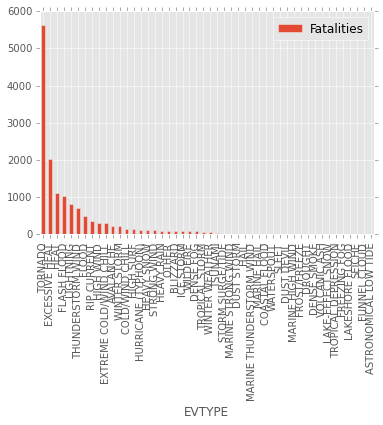

In [66]:
fatalities_df.plot(kind = 'bar')

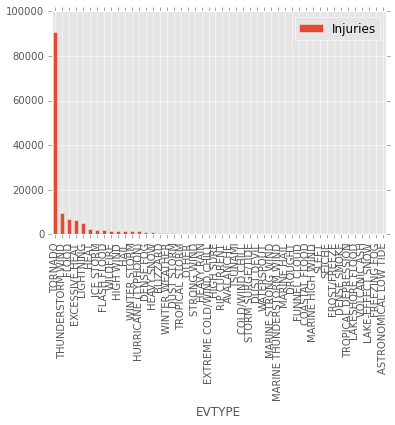

In [67]:
injuries_df.plot(kind = 'bar')

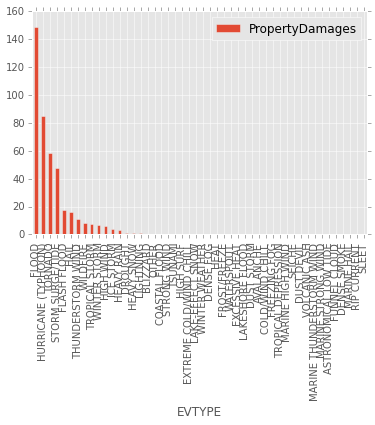

In [68]:
property_damages_df.plot(kind = 'bar')

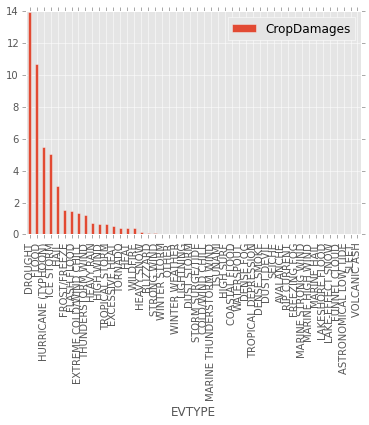

In [69]:
crop_damages_df.plot(kind = 'bar')

## Aggregation by year

In [70]:
df.BGN_DATE = pd.to_datetime(df.BGN_DATE)

In [71]:
df['Year'] = df.BGN_DATE.map(lambda timestamp: timestamp.year)

In [72]:
aggregated_df = df[ ['EVTYPE', 'STATE', 'Year', 'Fatalities', 'Injuries', 'PropertyDamages', 'CropDamages'] ].\
    groupby(['EVTYPE', 'STATE', 'Year']).\
    sum()

In [73]:
aggregated_df

Fatalities  Injuries  PropertyDamages  \
EVTYPE                STATE Year                                          
ASTRONOMICAL LOW TIDE CA    2007           0         0           120000   
                      ME    2008           0         0           200000   
AVALANCHE             AK    1995           0         0             5000   
                            1999          12         4            45000   
                            2000           5         5           754000   
...                                      ...       ...              ...   
WINTER WEATHER        WI    2009           0         2             8000   
                            2010           0         0           294800   
                            2011           0         0             8000   
                      WV    2006           0         0            60000   
                      WY    2010           0         0            20000   

                                  CropDamages  
EVTYPE                STATE Year               
ASTRONOMICAL LOW TIDE CA    2007            0  
                      ME    2008            0  
AVALANCHE             AK    1995          NaN  
                            1999          NaN  
                            2000          NaN  
...                                       ...  
WINTER WEATHER        WI    2009            0  
                            2010     15000000  
                            2011            0  
                      WV    2006            0  
                      WY    2010            0  

[12186 rows x 4 columns]

In [74]:
aggregated_df.to_csv(os.path.join('..', 'datasets', 'Storms-aggregated-by-years.csv'), quoting = csv.QUOTE_NONNUMERIC)